# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data and filtering out spaces from Categorical values of Summary Group

In [2]:
df = pd.read_excel("C:/Users/Yash/Desktop/ML_Projects/Data/Summer Intern Case Study Data_2023.xlsx")
df['Summary Group'] = df['Summary Group'].str.replace(' ', '')
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000


# Month on Sales Growth

In [3]:
df["Week"] = pd.to_datetime(df["Week"], format="%m/%d/%Y")
monthly_sales = df.groupby(pd.Grouper(key="Week", freq="M")).sum()["Sales Volume"]
sales_growth = monthly_sales.pct_change()
print(sales_growth)

Week
2020-10-31         NaN
2020-11-30   -0.053744
2020-12-31   -0.085467
2021-01-31    0.838484
2021-02-28   -0.376797
2021-03-31    0.135098
2021-04-30   -0.112648
2021-05-31    0.120525
2021-06-30   -0.251250
2021-07-31    0.323452
2021-08-31    0.235179
2021-09-30   -0.110440
2021-10-31    0.043208
2021-11-30   -0.254851
2021-12-31    0.039655
2022-01-31    0.622160
2022-02-28   -0.364341
2022-03-31   -0.015062
2022-04-30    0.075278
2022-05-31   -0.219168
2022-06-30   -0.093990
2022-07-31    0.221244
2022-08-31   -0.048502
2022-09-30   -0.078358
2022-10-31   -0.766016
Freq: M, Name: Sales Volume, dtype: float64


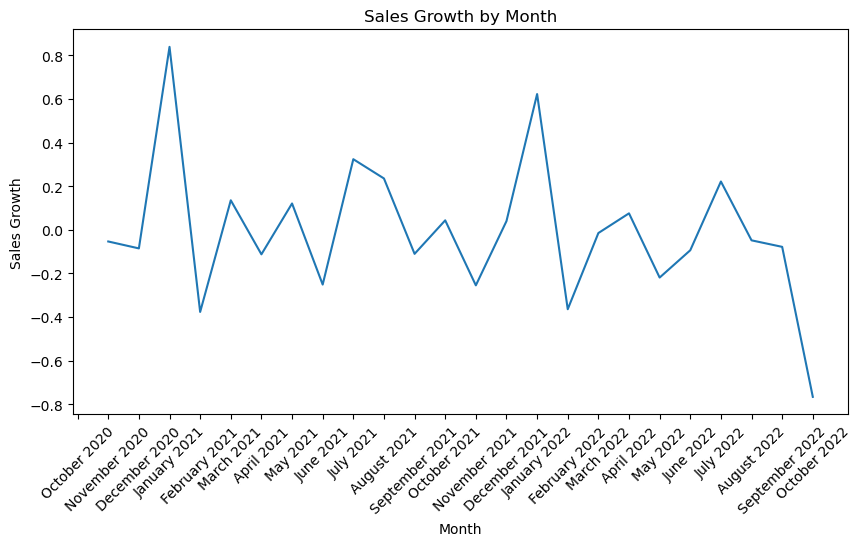

In [4]:
s = pd.Series(data=[None, -0.053744, -0.085467, 0.838484, -0.376797, 0.135098, -0.112648,
                    0.120525, -0.251250, 0.323452, 0.235179, -0.110440, 0.043208, -0.254851,
                    0.039655, 0.622160, -0.364341, -0.015062, 0.075278, -0.219168, -0.093990,
                    0.221244, -0.048502, -0.078358, -0.766016],
              index=pd.date_range(start='2020-10-31', periods=25, freq='M'))

s.index = s.index.strftime('%B %Y')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(s.index, s)
ax.set_xlabel('Month')
plt.xticks(rotation=45)
ax.set_ylabel('Sales Growth')
ax.set_title('Sales Growth by Month')
plt.show()

month_name  year
April       2021    4.655417e+06
            2022    5.012806e+06
August      2021    6.384911e+06
            2022    4.120803e+06
December    2020    4.034037e+06
            2021    4.590218e+06
February    2021    4.621991e+06
            2022    4.733158e+06
January     2021    7.416511e+06
            2022    7.446069e+06
July        2021    5.169221e+06
            2022    4.330860e+06
June        2021    3.905861e+06
            2022    3.546268e+06
March       2021    5.246414e+06
            2022    4.661868e+06
May         2021    5.216512e+06
            2022    3.914161e+06
November    2020    4.411034e+06
            2021    4.415134e+06
October     2020    4.661567e+06
            2021    5.925169e+06
            2022    8.886470e+05
September   2021    5.679759e+06
            2022    3.797904e+06
Name: Profit, dtype: float64


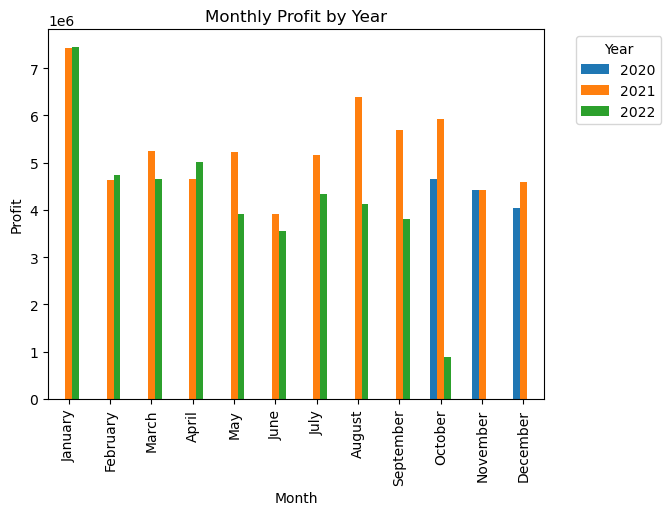

In [5]:
df['month_name'] = df['Week'].dt.strftime('%B')
df['year'] = df['Week'].dt.year
monthly_profit = df.groupby(['month_name', 'year'])["Profit"].sum()
print(monthly_profit)

monthly_profit = monthly_profit.reset_index().pivot(index='month_name', columns='year', values='Profit')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# reindex the rows of monthly_profit based on the month_order list
monthly_profit = monthly_profit.reindex(month_order)

# plot a bar plot
ax = monthly_profit.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Profit')
ax.set_title('Monthly Profit by Year')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Grouping By Summary Group to get ROI for each category

In [6]:
group_SummaryGroup = df.groupby('Summary Group').sum()[['Sales Volume', 'Profit', 'Spend']]
group_SummaryGroup = group_SummaryGroup.sort_values(by="Profit", ascending = False)
print(group_SummaryGroup)

                   Sales Volume        Profit         Spend
Summary Group                                              
Base               1.702652e+09  1.021591e+08  0.000000e+00
Media              1.619078e+08  9.714469e+06  1.675635e+07
Trade              1.037003e+08  6.222021e+06  1.267035e+07
ConsumerPromotion  1.151139e+07  6.906833e+05  2.698325e+06


In [7]:
group_SummaryGroup["ROI"] = ((group_SummaryGroup["Profit"] - group_SummaryGroup["Spend"]) / group_SummaryGroup["Spend"]) * 100
group_SummaryGroup

,Sales Volume,Profit,Spend,ROI
Summary Group,,,,
Base,1.702652e+09,1.021591e+08,0.000000e+00,inf
Media,1.619078e+08,9.714469e+06,1.675635e+07,-42.025136
Trade,1.037003e+08,6.222021e+06,1.267035e+07,-50.893058
ConsumerPromotion,1.151139e+07,6.906833e+05,2.698325e+06,-74.403257


In [8]:
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020


<AxesSubplot:xlabel='Summary Group', ylabel='Profit'>

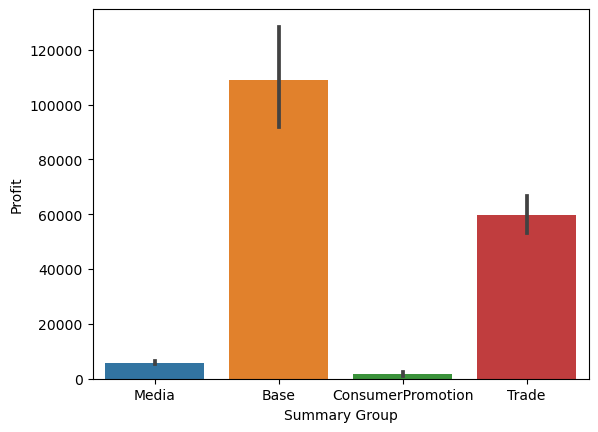

In [9]:
sns.barplot(x=df["Summary Group"], y=df["Profit"])

<AxesSubplot:xlabel='Summary Group', ylabel='Spend'>

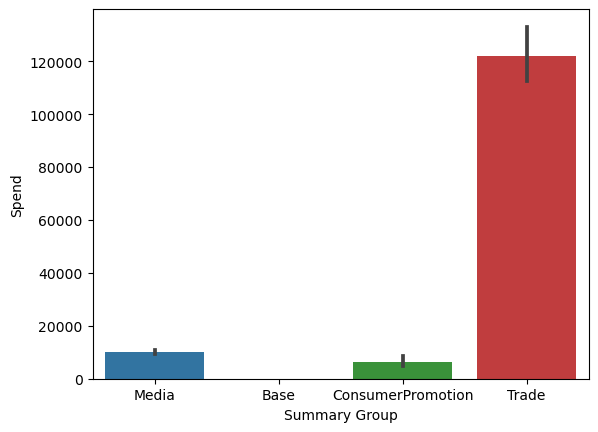

In [10]:
sns.barplot(x=df["Summary Group"], y=df["Spend"])

<AxesSubplot:xlabel='Summary Group', ylabel='Sales Volume'>

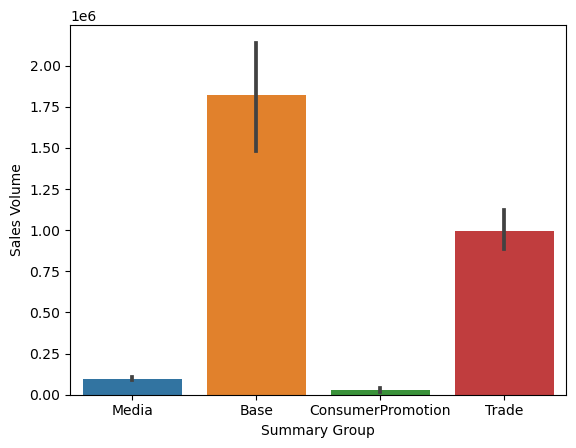

In [11]:
sns.barplot(x=df["Summary Group"], y=df["Sales Volume"])

In [12]:
df.columns

Index(['Week', 'Event', 'Summary Group', 'Tactic', 'Execution', 'Sales Volume',
       'Profit', 'Spend', 'month_name', 'year'],
      dtype='object')

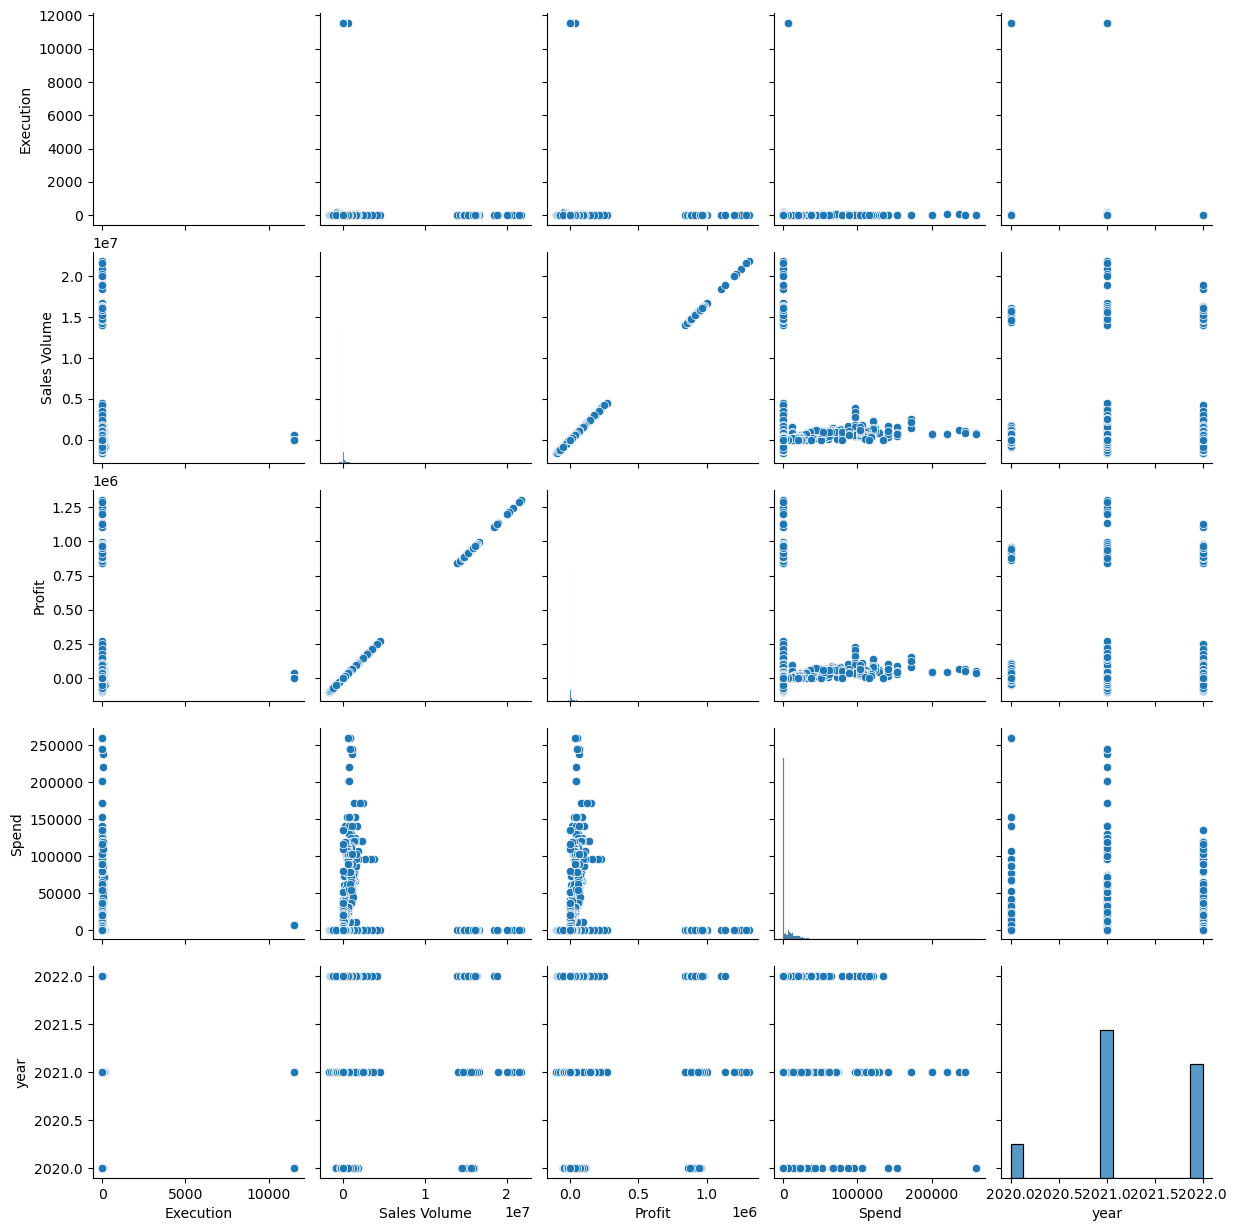

In [13]:
sns.pairplot(df[['Execution', 'Sales Volume', 'Profit', 'Spend', 'month_name', 'year']])

In [14]:
df.describe()

,Execution,Sales Volume,Profit,Spend,year
count,3120.000000,3.120000e+03,3.120000e+03,3120.000000,3120.000000
mean,194.081016,6.345422e+05,3.807253e+04,10296.480594,2021.269231
std,1477.173639,2.843448e+06,1.706069e+05,26872.948129,0.653951
min,0.000000,-1.650810e+06,-9.904857e+04,0.000000,2020.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,2021.000000
50%,0.000000,8.550226e+03,5.130136e+02,0.000000,2021.000000
75%,0.591399,1.399035e+05,8.394210e+03,9571.569986,2022.000000
max,11538.461540,2.177993e+07,1.306796e+06,259602.364200,2022.000000


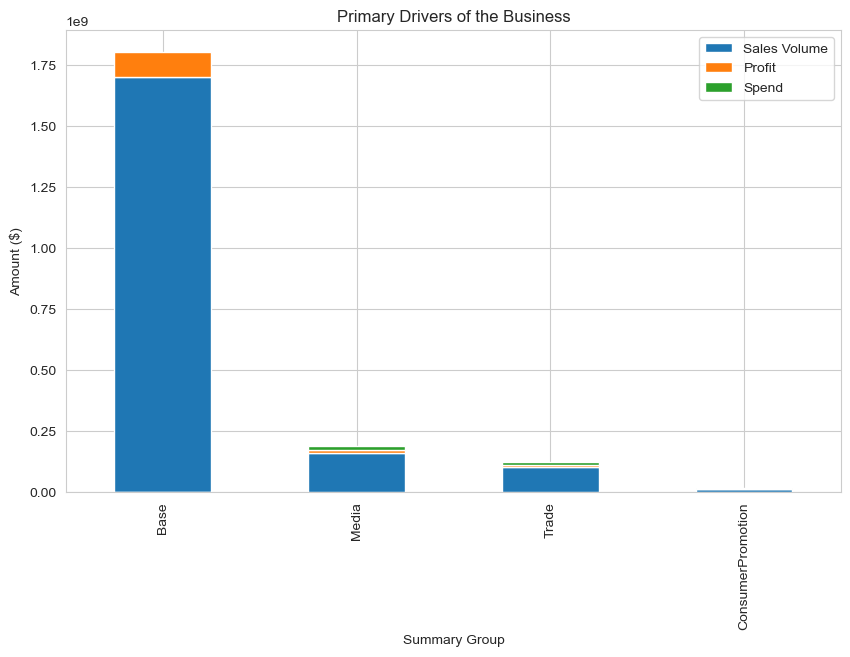

In [15]:
grouped_data = df.groupby('Summary Group').sum()[['Sales Volume', 'Profit', 'Spend']]
grouped_data = grouped_data.sort_values(by="Profit", ascending=False)

sns.set_style("whitegrid")
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Amount ($)')
ax.set_title('Primary Drivers of the Business')
plt.show()

# Converting Week to Year, Day of Week, Month, and Quarter

In [16]:
df['Week'] = pd.to_datetime(df['Week'])

# extract day of the week and week number
df['day_of_week'] = df['Week'].dt.day_name()
#df['week_number'] = df['Week'].dt.week

# extract other relevant time-based features
df['year'] = df['Week'].dt.year
df['month'] = df['Week'].dt.month
df['quarter'] = df['Week'].dt.quarter

In [17]:
df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,day_of_week,month,quarter
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,Saturday,10,4
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,Saturday,10,4
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020,Saturday,10,4
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020,Saturday,10,4
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020,Saturday,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,2022-10-01,Seasonality,Base,Seasonality,0.000000,2.634118e+05,15804.705870,0.000000,October,2022,Saturday,10,4
3116,2022-10-01,Trade Promo,Trade,Trade Promo,0.000000,6.178045e+05,37068.267690,88556.856510,October,2022,Saturday,10,4
3117,2022-10-01,Trend,Base,Trend,0.000000,2.246527e+05,13479.160410,0.000000,October,2022,Saturday,10,4
3118,2022-10-01,VPC,Base,VPC,0.000000,0.000000e+00,0.000000,0.000000,October,2022,Saturday,10,4


In [18]:
#df = df.drop("Week",axis=1)

In [19]:
df = df.drop("day_of_week",axis=1)

In [20]:
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,October,2020,10,4
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,October,2020,10,4
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,October,2020,10,4


# Doing Label Encoding for the Year Categorical Column

In [21]:
#from sklearn.preprocessing import LabelEncoder

#label = LabelEncoder()

# fit and transform the day_of_week column
#df['year'] = label.fit_transform(df['year'])

# print the encoded values
#print(df['year'].unique())

In [22]:
df.tail()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
3115,2022-10-01,Seasonality,Base,Seasonality,0.0,263411.7646,15804.70587,0.00000,October,2022,10,4
3116,2022-10-01,Trade Promo,Trade,Trade Promo,0.0,617804.4614,37068.26769,88556.85651,October,2022,10,4
3117,2022-10-01,Trend,Base,Trend,0.0,224652.6735,13479.16041,0.00000,October,2022,10,4
3118,2022-10-01,VPC,Base,VPC,0.0,0.0000,0.00000,0.00000,October,2022,10,4
3119,2022-10-01,YouTube,Media,YouTube,0.0,0.0000,0.00000,0.00000,October,2022,10,4


<AxesSubplot:>

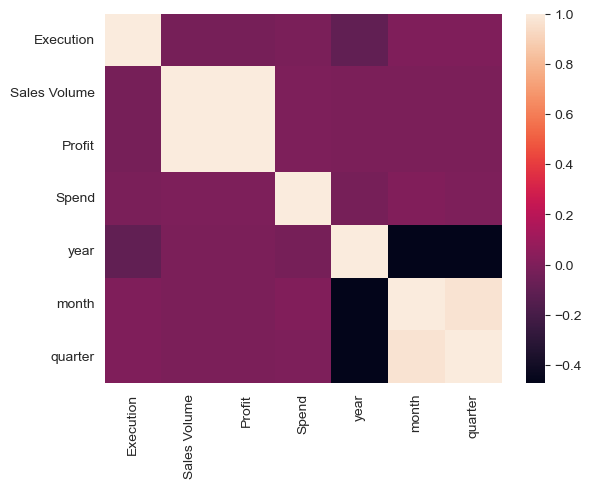

In [23]:
sns.heatmap(df.corr())

# Analyzing Summary Groups separately

In [24]:
base_df = df[df['Summary Group'] == 'Base']
media_df = df[df['Summary Group'] == 'Media']
trade_df = df[df['Summary Group'] == 'Trade']
consumer_promo_df = df[df['Summary Group'] == 'ConsumerPromotion']

# Cost Benefit Analysis

In [173]:
cba_base = base_df.groupby(['Tactic', 'month_name',"year"])
cost = cba_base['Spend'].sum()
benefit = cba_base['Profit'].sum()

roi = benefit / cost

roi_base = roi.reset_index(name='ROI')
print(roi_base)

    Tactic month_name  year  ROI
0    COVID      April  2021  inf
1    COVID      April  2022  inf
2    COVID     August  2021  inf
3    COVID     August  2022  NaN
4    COVID   December  2020 -inf
..     ...        ...   ...  ...
220    VPC    October  2020  inf
221    VPC    October  2021  inf
222    VPC    October  2022  NaN
223    VPC  September  2021  inf
224    VPC  September  2022  inf

[225 rows x 4 columns]


In [174]:
cba_media = media_df.groupby(['Tactic', 'month_name',"year"])
cost = cba_media['Spend'].sum()
benefit = cba_media['Profit'].sum()

roi = benefit / cost

roi_media = roi.reset_index(name='ROI')
print(roi_media)

             Tactic month_name  year       ROI
0    Amazon Display      April  2021  0.287506
1    Amazon Display      April  2022  0.164472
2    Amazon Display     August  2021  0.277675
3    Amazon Display     August  2022  0.157349
4    Amazon Display   December  2020  0.275619
..              ...        ...   ...       ...
370         YouTube    October  2020       NaN
371         YouTube    October  2021       NaN
372         YouTube    October  2022       NaN
373         YouTube  September  2021       NaN
374         YouTube  September  2022       NaN

[375 rows x 4 columns]


In [175]:
cba_trade = trade_df.groupby(['Tactic', 'month_name',"year"])
cost = cba_trade['Spend'].sum()
benefit = cba_trade['Profit'].sum()

roi = benefit / cost

roi_trade = roi.reset_index(name='ROI')
print(roi_trade)

         Tactic month_name  year       ROI
0   Trade Promo      April  2021  5.465545
1   Trade Promo      April  2022  0.528314
2   Trade Promo     August  2021  0.618523
3   Trade Promo     August  2022  0.693354
4   Trade Promo   December  2020  0.176602
5   Trade Promo   December  2021  0.210743
6   Trade Promo   February  2021  0.483557
7   Trade Promo   February  2022  0.544785
8   Trade Promo    January  2021  1.621122
9   Trade Promo    January  2022  0.804219
10  Trade Promo       July  2021  0.408231
11  Trade Promo       July  2022  0.396017
12  Trade Promo       June  2021  0.382789
13  Trade Promo       June  2022  0.329197
14  Trade Promo      March  2021  0.736482
15  Trade Promo      March  2022  0.413880
16  Trade Promo        May  2021  0.732515
17  Trade Promo        May  2022  0.371941
18  Trade Promo   November  2020  0.339202
19  Trade Promo   November  2021  0.306949
20  Trade Promo    October  2020  0.351949
21  Trade Promo    October  2021  0.384398
22  Trade P

In [176]:
cba_consumer = consumer_promo_df.groupby(['Tactic', 'month_name',"year"])
cost = cba_consumer['Spend'].sum()
benefit = cba_consumer['Profit'].sum()

roi = benefit / cost

roi_consumer = roi.reset_index(name='ROI')
print(roi_consumer)

             Tactic month_name  year       ROI
0   Digital Coupons      April  2021  0.304873
1   Digital Coupons      April  2022  0.444479
2   Digital Coupons     August  2021  0.150790
3   Digital Coupons     August  2022  0.215122
4   Digital Coupons   December  2020  0.405273
5   Digital Coupons   December  2021  0.713788
6   Digital Coupons   February  2021  0.202419
7   Digital Coupons   February  2022  0.198022
8   Digital Coupons    January  2021  0.220037
9   Digital Coupons    January  2022  0.286311
10  Digital Coupons       July  2021  0.170406
11  Digital Coupons       July  2022  0.446976
12  Digital Coupons       June  2021  0.096197
13  Digital Coupons       June  2022  0.203600
14  Digital Coupons      March  2021  0.192124
15  Digital Coupons      March  2022  0.263744
16  Digital Coupons        May  2021  0.180982
17  Digital Coupons        May  2022  0.210237
18  Digital Coupons   November  2020  0.167051
19  Digital Coupons   November  2021  0.114191
20  Digital C

In [29]:
roi_base['Tactic'].unique()

array(['COVID', 'Competitive', 'Core/Base', 'Distribution',
       'New Subscribe & Save', 'Price', 'Seasonality', 'Trend', 'VPC'],
      dtype=object)

In [30]:
roi_media['Tactic'].unique()

array(['Amazon Display', 'Amazon Search', 'Digital Display',
       'Ecomm: Retail Display', 'Ecomm: Search', 'Influencer', 'OLV',
       'PR', 'Paid Search: Criteo', 'Paid Search: Google+Bing',
       'Paid Search: Pinterest', 'Paid Social: Meta',
       'Paid Social: Pinterest', 'Paid Social: Twitter', 'YouTube'],
      dtype=object)

In [31]:
roi_consumer['Tactic'].unique()

array(['Digital Coupons', 'Sampling'], dtype=object)

In [32]:
roi_trade['Tactic'].unique()

array(['Trade Promo'], dtype=object)

# Finding Tactic with high Profits

In [33]:
base_df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
2,2020-10-10,Competitive,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,October,2020,10,4
3,2020-10-10,Core/Base,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,October,2020,10,4
4,2020-10-10,COVID,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,October,2020,10,4
7,2020-10-10,Distribution,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,October,2020,10,4
13,2020-10-10,New Subscribe & Save,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3103,2022-10-01,New Subscribe & Save,Base,New Subscribe & Save,0.0,4.486856e+04,2692.113363,0.0,October,2022,10,4
3112,2022-10-01,Price,Base,Price,0.0,-8.863422e+05,-53180.531040,0.0,October,2022,10,4
3115,2022-10-01,Seasonality,Base,Seasonality,0.0,2.634118e+05,15804.705870,0.0,October,2022,10,4
3117,2022-10-01,Trend,Base,Trend,0.0,2.246527e+05,13479.160410,0.0,October,2022,10,4


In [107]:
base_max = base_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
base_max

Tactic
Core/Base               9.790302e+07
COVID                   5.204005e+06
Trend                   1.157379e+06
Seasonality             4.481112e+05
New Subscribe & Save    1.766816e+05
VPC                     1.615597e+04
Price                  -1.433033e+05
Distribution           -4.055673e+05
Competitive            -2.197355e+06
Name: Profit, dtype: float64

In [108]:
media_max = media_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
media_max

Tactic
Digital Display             3.940335e+06
Paid Social: Meta           1.795403e+06
Amazon Search               8.184402e+05
OLV                         6.417299e+05
Amazon Display              6.230623e+05
Paid Search: Google+Bing    6.052218e+05
PR                          4.295700e+05
Paid Social: Pinterest      4.180926e+05
Paid Search: Criteo         1.179821e+05
Ecomm: Retail Display       7.113060e+04
Influencer                  6.651764e+04
Ecomm: Search               5.941255e+04
Paid Search: Pinterest      5.716338e+04
YouTube                     4.512534e+04
Paid Social: Twitter        2.528167e+04
Name: Profit, dtype: float64

In [109]:
consumer_max = consumer_promo_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
consumer_max

Tactic
Digital Coupons    525175.862541
Sampling           165507.429700
Name: Profit, dtype: float64

In [111]:
trade_max = trade_df.groupby(['Tactic'])['Profit'].sum().sort_values(ascending=False)
trade_max

Tactic
Trade Promo    6.222021e+06
Name: Profit, dtype: float64

In [112]:
result_max = pd.concat([base_max, media_max, trade_max, consumer_max])
result_max = result_max.sort_values(ascending=False)
result_max

Tactic
Core/Base                   9.790302e+07
Trade Promo                 6.222021e+06
COVID                       5.204005e+06
Digital Display             3.940335e+06
Paid Social: Meta           1.795403e+06
Trend                       1.157379e+06
Amazon Search               8.184402e+05
OLV                         6.417299e+05
Amazon Display              6.230623e+05
Paid Search: Google+Bing    6.052218e+05
Digital Coupons             5.251759e+05
Seasonality                 4.481112e+05
PR                          4.295700e+05
Paid Social: Pinterest      4.180926e+05
New Subscribe & Save        1.766816e+05
Sampling                    1.655074e+05
Paid Search: Criteo         1.179821e+05
Ecomm: Retail Display       7.113060e+04
Influencer                  6.651764e+04
Ecomm: Search               5.941255e+04
Paid Search: Pinterest      5.716338e+04
YouTube                     4.512534e+04
Paid Social: Twitter        2.528167e+04
VPC                         1.615597e+04
Price    

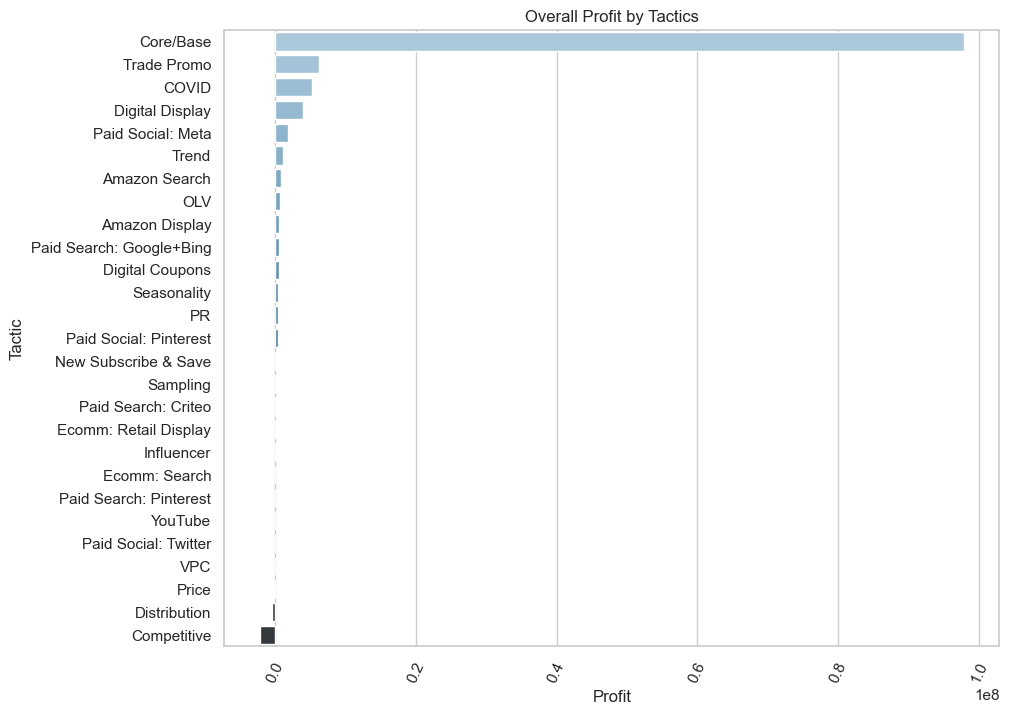

In [114]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=result_max.values, y=result_max.index, palette="Blues_d")
ax.set_xlabel('Profit')
ax.set_ylabel('Tactic')
ax.set_title('Overall Profit by Tactics')
plt.xticks(rotation=65)
plt.show()

# Playing with roi_base, roi_media, roi_consumer, roi_trade

In [136]:
roi_base_max = roi_base.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)

In [137]:
roi_media_max = roi_media.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)

In [138]:
roi_trade_max = roi_trade.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)

In [139]:
roi_consumer_max = roi_consumer.groupby(['Tactic'])['ROI'].sum().reset_index().sort_values('ROI',ascending=False)

In [146]:
roi_media_max

,Tactic,ROI
12,Paid Social: Pinterest,41.152087
7,PR,31.016679
2,Digital Display,26.599072
11,Paid Social: Meta,18.499242
9,Paid Search: Google+Bing,12.709207
1,Amazon Search,12.510184
6,OLV,11.769345
8,Paid Search: Criteo,10.227908
0,Amazon Display,6.318435
10,Paid Search: Pinterest,2.943538


In [148]:
roi_result_max = pd.concat([roi_base_max, roi_media_max, roi_trade_max, roi_consumer_max])
roi_result_max = roi_result_max.sort_values('ROI',ascending=False)
roi_result_max

,Tactic,ROI
12,Paid Social: Pinterest,41.152087
7,PR,31.016679
2,Digital Display,26.599072
11,Paid Social: Meta,18.499242
0,Trade Promo,17.572334
9,Paid Search: Google+Bing,12.709207
1,Amazon Search,12.510184
6,OLV,11.769345
8,Paid Search: Criteo,10.227908
0,Amazon Display,6.318435


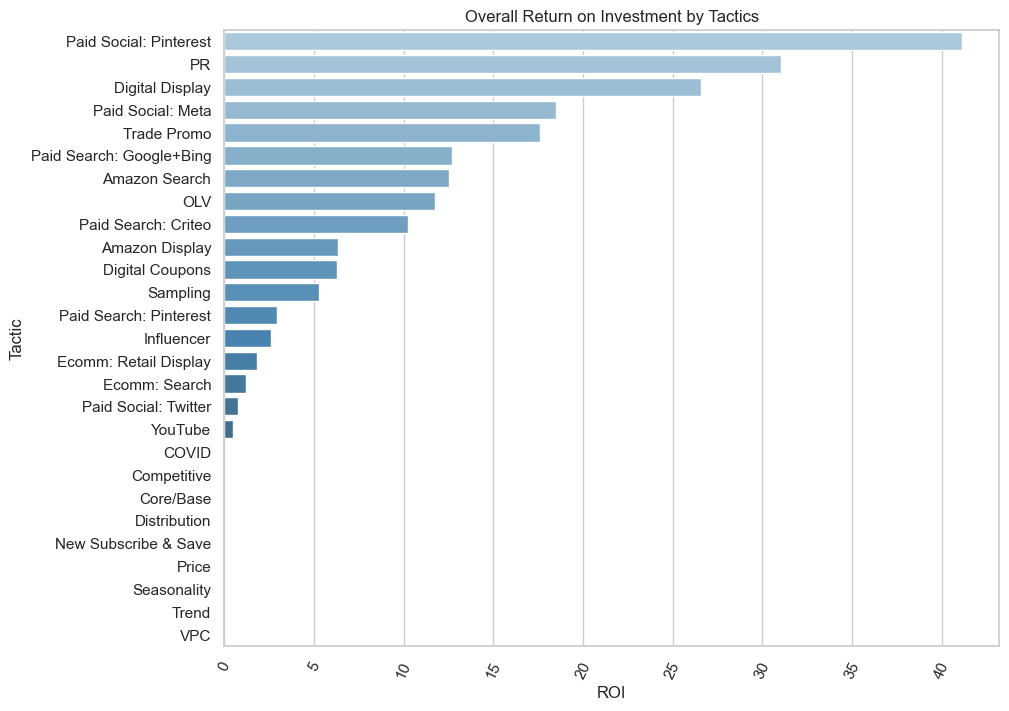

In [153]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=roi_result_max['ROI'], y=roi_result_max['Tactic'], palette="Blues_d")
ax.set_xlabel('ROI')
ax.set_ylabel('Tactic')
ax.set_title('Overall Return on Investment by Tactics')
plt.xticks(rotation=65)
plt.show()

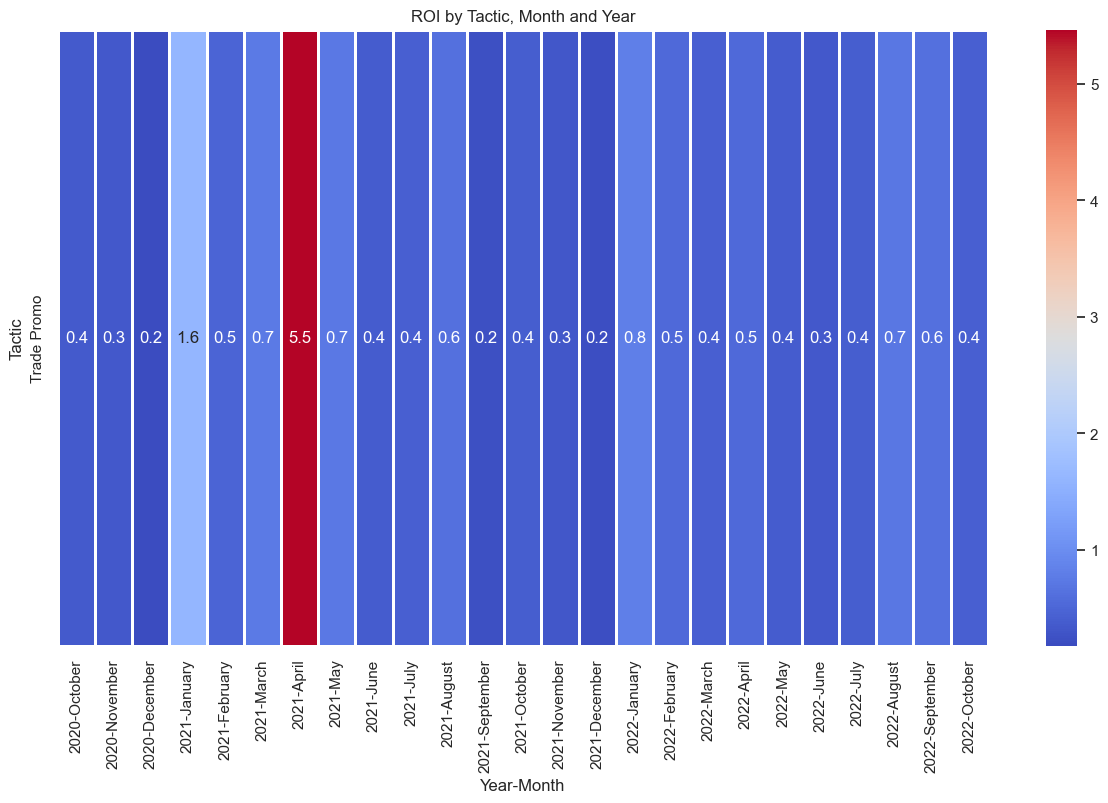

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_trade.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI by Tactic, Month and Year')

plt.xticks(rotation=90)

plt.show()

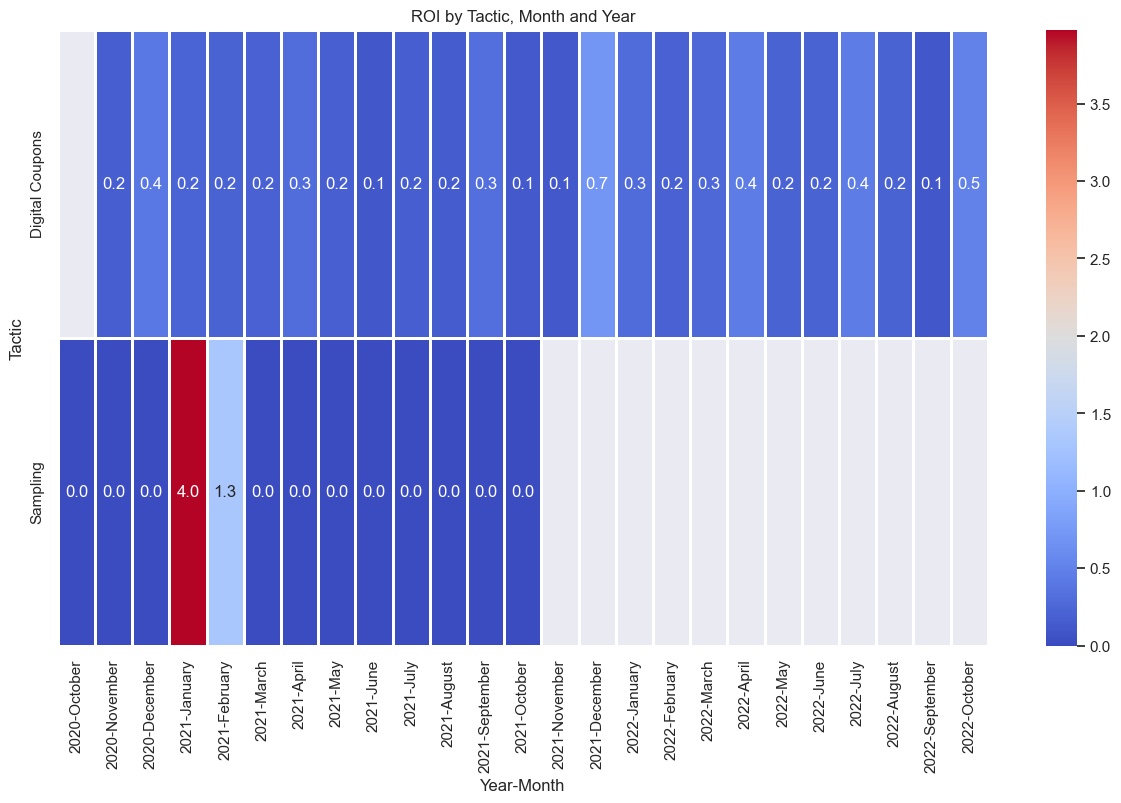

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_consumer.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI by Tactic, Month and Year')

plt.xticks(rotation=90)

plt.show()

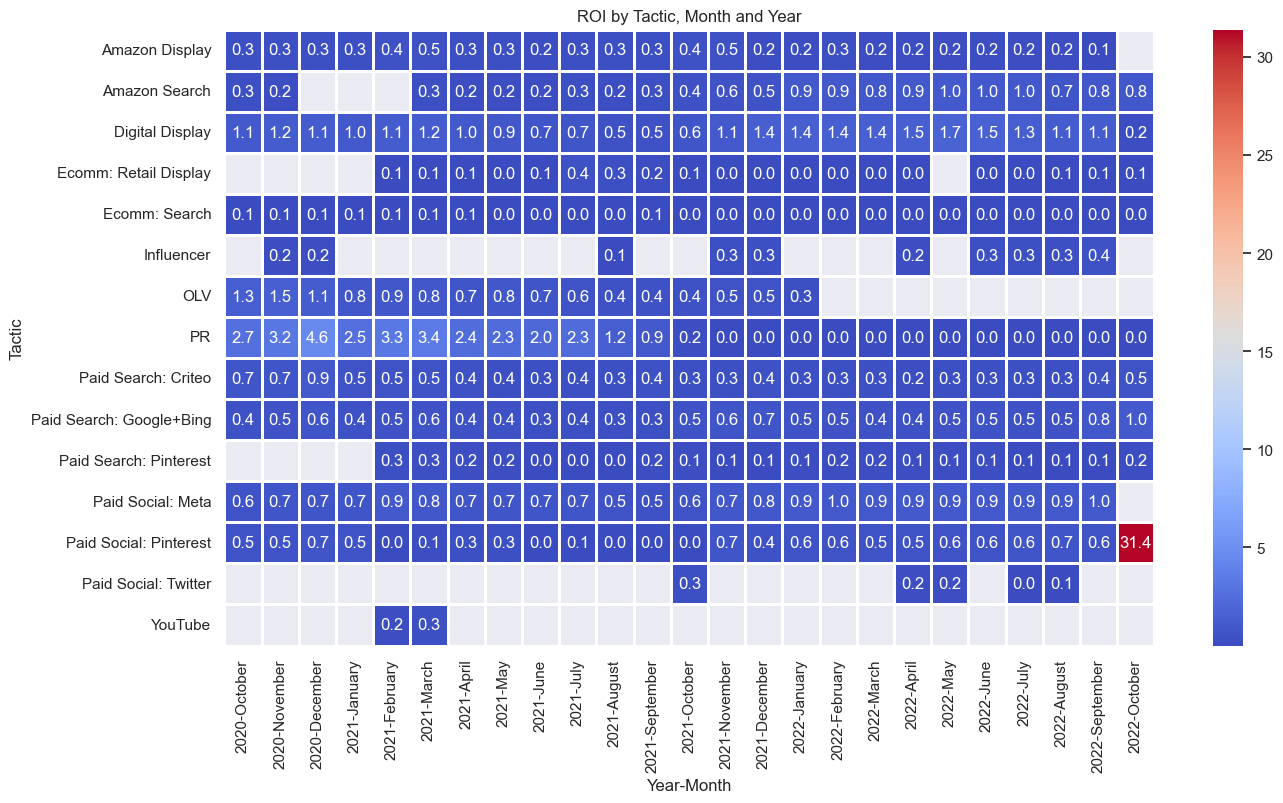

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_media.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI by Tactic, Month and Year')

plt.xticks(rotation=90)

plt.show()

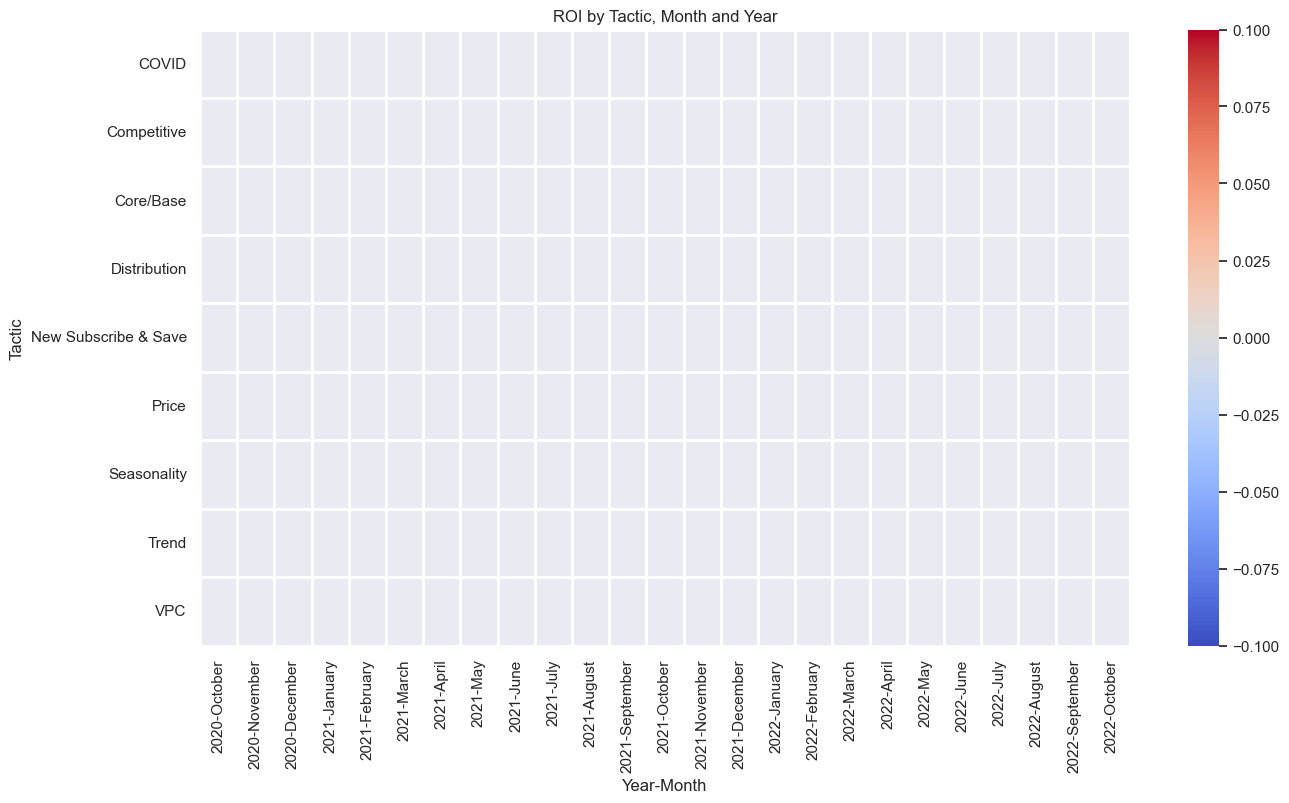

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = roi_base.pivot(index='Tactic', columns=['year', 'month_name'], values='ROI')

sns.set(style="darkgrid")

plt.figure(figsize=(15,8))

sns.heatmap(pivot_df, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f")

plt.xlabel("Year-Month")
plt.title('ROI by Tactic, Month and Year')

plt.xticks(rotation=90)

plt.show()

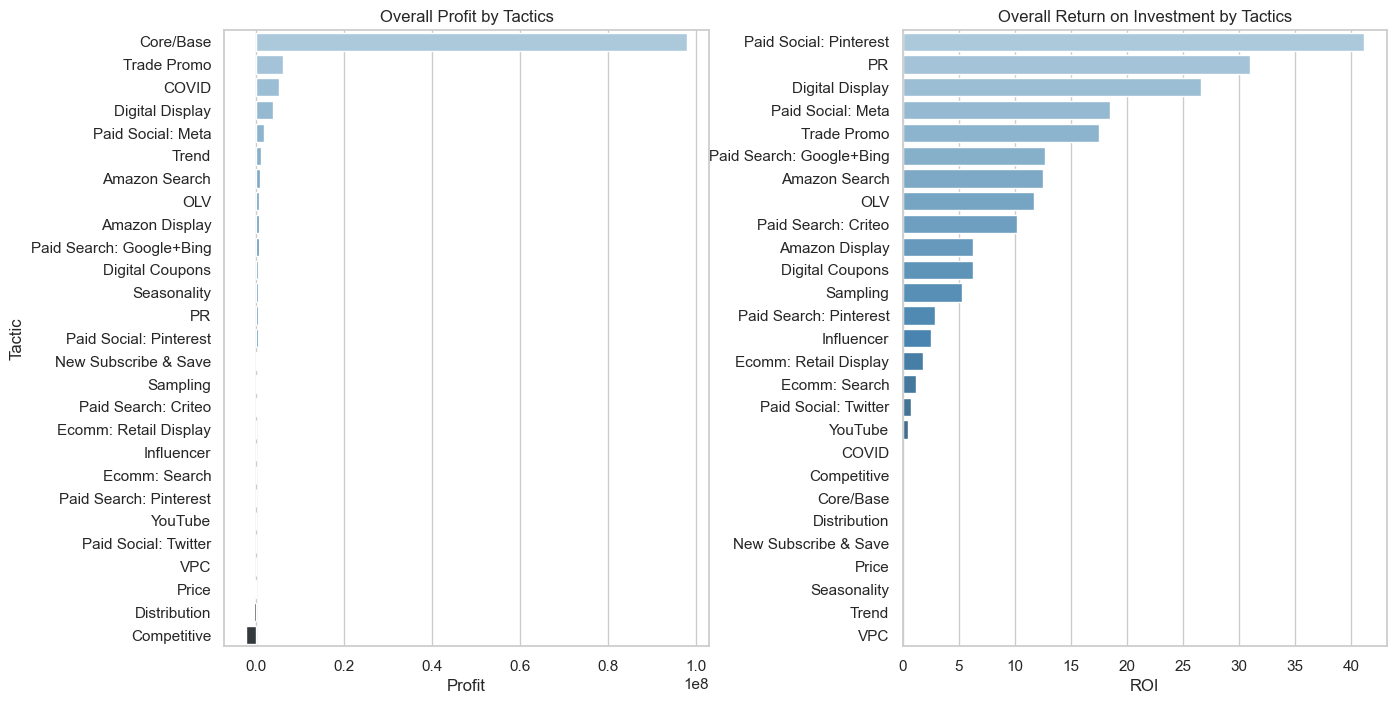

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))

# Plot the first graph in the first subplot
sns.barplot(x=result_max.values, y=result_max.index, palette="Blues_d", ax=ax1)
ax1.set_xlabel('Profit')
ax1.set_ylabel('Tactic')
ax1.set_title('Overall Profit by Tactics')
ax1.tick_params(axis='y', labelrotation=0)

# Plot the second graph in the second subplot
sns.barplot(x=roi_result_max['ROI'], y=roi_result_max['Tactic'], palette="Blues_d", ax=ax2)
ax2.set_xlabel('ROI')
ax2.set_ylabel('')
ax2.set_title('Overall Return on Investment by Tactics')
ax2.tick_params(axis='y', labelrotation=0)

# Adjust the layout to make room for the y-axis label of the second subplot
plt.subplots_adjust(wspace=0.4)

plt.show()


# Testing

In [189]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_trade['month_name'] = roi_trade['month_name'].astype(cat_month)

roi_trade = roi_trade.sort_values(by=['year', 'month_name'])

roi_trade = roi_trade.reset_index(drop=True)
roi_trade = pd.DataFrame(roi_trade)
roi_trade

,Tactic,month_name,year,ROI,month_year
0,Trade Promo,October,2020,0.351949,October 2020
1,Trade Promo,November,2020,0.339202,November 2020
2,Trade Promo,December,2020,0.176602,December 2020
3,Trade Promo,January,2021,1.621122,January 2021
4,Trade Promo,February,2021,0.483557,February 2021
5,Trade Promo,March,2021,0.736482,March 2021
6,Trade Promo,April,2021,5.465545,April 2021
7,Trade Promo,May,2021,0.732515,May 2021
8,Trade Promo,June,2021,0.382789,June 2021
9,Trade Promo,July,2021,0.408231,July 2021


In [190]:
import pandas as pd
roi_trade['month_year'] = roi_trade['month_name'].astype(str) + ' ' + roi_trade['year'].astype(str)

print(roi_trade)

         Tactic month_name  year       ROI      month_year
0   Trade Promo    October  2020  0.351949    October 2020
1   Trade Promo   November  2020  0.339202   November 2020
2   Trade Promo   December  2020  0.176602   December 2020
3   Trade Promo    January  2021  1.621122    January 2021
4   Trade Promo   February  2021  0.483557   February 2021
5   Trade Promo      March  2021  0.736482      March 2021
6   Trade Promo      April  2021  5.465545      April 2021
7   Trade Promo        May  2021  0.732515        May 2021
8   Trade Promo       June  2021  0.382789       June 2021
9   Trade Promo       July  2021  0.408231       July 2021
10  Trade Promo     August  2021  0.618523     August 2021
11  Trade Promo  September  2021  0.236571  September 2021
12  Trade Promo    October  2021  0.384398    October 2021
13  Trade Promo   November  2021  0.306949   November 2021
14  Trade Promo   December  2021  0.210743   December 2021
15  Trade Promo    January  2022  0.804219    January 20

In [191]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_base['month_name'] = roi_base['month_name'].astype(cat_month)

roi_base = roi_base.sort_values(by=['year', 'month_name'])

roi_base = roi_base.reset_index(drop=True)
roi_base = pd.DataFrame(roi_base)
print(roi_base)

                   Tactic month_name  year  ROI    month_year
0                   COVID    October  2020 -inf  October 2020
1             Competitive    October  2020  inf  October 2020
2               Core/Base    October  2020  inf  October 2020
3            Distribution    October  2020  inf  October 2020
4    New Subscribe & Save    October  2020  inf  October 2020
..                    ...        ...   ...  ...           ...
220  New Subscribe & Save    October  2022  inf  October 2022
221                 Price    October  2022 -inf  October 2022
222           Seasonality    October  2022  inf  October 2022
223                 Trend    October  2022  inf  October 2022
224                   VPC    October  2022  NaN  October 2022

[225 rows x 5 columns]


In [192]:
roi_base['month_year'] = roi_base['month_name'].astype(str) + ' ' + roi_base['year'].astype(str)

In [193]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_media['month_name'] = roi_media['month_name'].astype(cat_month)

roi_media = roi_media.sort_values(by=['year', 'month_name'])

roi_media = roi_media.reset_index(drop=True)
roi_media = pd.DataFrame(roi_media)
print(roi_media)

                     Tactic month_name  year        ROI    month_year
0            Amazon Display    October  2020   0.285349  October 2020
1             Amazon Search    October  2020   0.321215  October 2020
2           Digital Display    October  2020   1.073578  October 2020
3     Ecomm: Retail Display    October  2020        NaN  October 2020
4             Ecomm: Search    October  2020   0.085762  October 2020
..                      ...        ...   ...        ...           ...
370  Paid Search: Pinterest    October  2022   0.193493  October 2022
371       Paid Social: Meta    October  2022        NaN  October 2022
372  Paid Social: Pinterest    October  2022  31.399743  October 2022
373    Paid Social: Twitter    October  2022        NaN  October 2022
374                 YouTube    October  2022        NaN  October 2022

[375 rows x 5 columns]


In [194]:
roi_media['month_year'] = roi_media['month_name'].astype(str) + ' ' + roi_media['year'].astype(str)

In [195]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)

roi_consumer['month_name'] = roi_consumer['month_name'].astype(cat_month)

roi_consumer = roi_consumer.sort_values(by=['year', 'month_name'])

roi_consumer = roi_consumer.reset_index(drop=True)
consumer_roi_eda = pd.DataFrame(roi_consumer)
print(roi_consumer)

             Tactic month_name  year       ROI      month_year
0   Digital Coupons    October  2020       NaN    October 2020
1          Sampling    October  2020  0.000000    October 2020
2   Digital Coupons   November  2020  0.167051   November 2020
3          Sampling   November  2020  0.000000   November 2020
4   Digital Coupons   December  2020  0.405273   December 2020
5          Sampling   December  2020  0.000000   December 2020
6   Digital Coupons    January  2021  0.220037    January 2021
7          Sampling    January  2021  3.978193    January 2021
8   Digital Coupons   February  2021  0.202419   February 2021
9          Sampling   February  2021  1.318477   February 2021
10  Digital Coupons      March  2021  0.192124      March 2021
11         Sampling      March  2021  0.000000      March 2021
12  Digital Coupons      April  2021  0.304873      April 2021
13         Sampling      April  2021  0.000000      April 2021
14  Digital Coupons        May  2021  0.180982        M

In [196]:
roi_consumer['month_year'] = roi_consumer['month_name'].astype(str) + ' ' + roi_consumer['year'].astype(str)

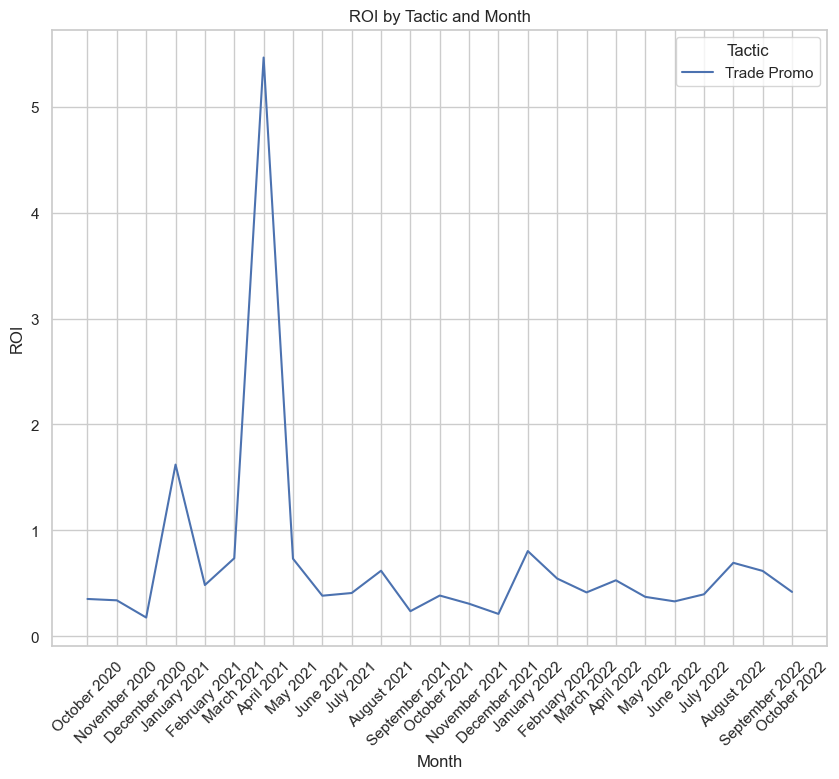

In [197]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month_year', y='ROI', hue='Tactic', data=roi_trade, markers=True)
plt.xticks(rotation=45)
plt.title('ROI by Tactic and Month')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.show()

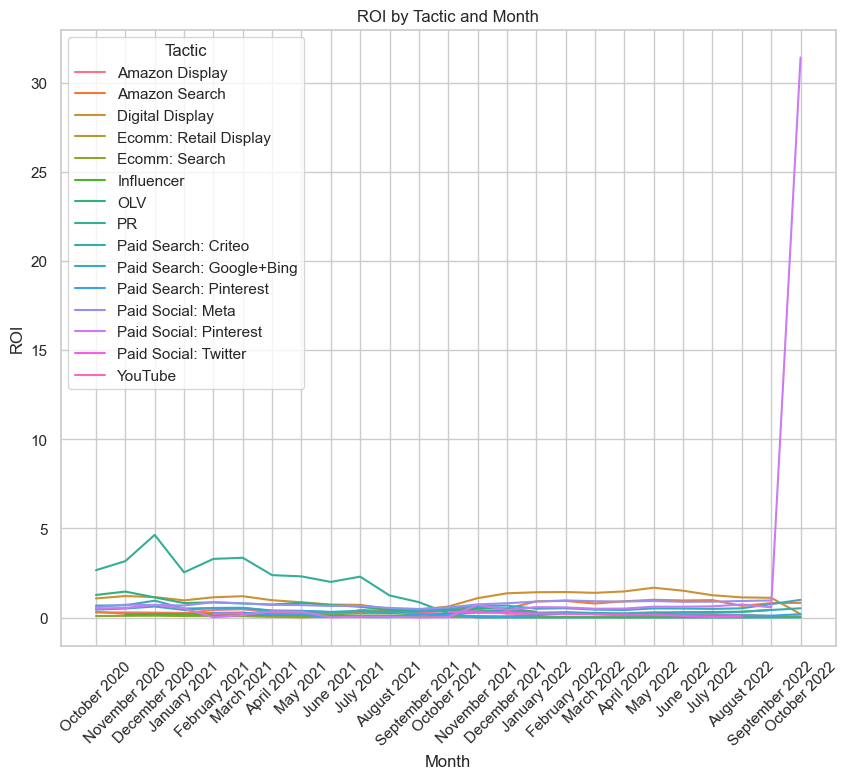

In [198]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month_year', y='ROI', hue='Tactic', data=roi_media, markers=True)
plt.xticks(rotation=45)
plt.title('ROI by Tactic and Month')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.show()

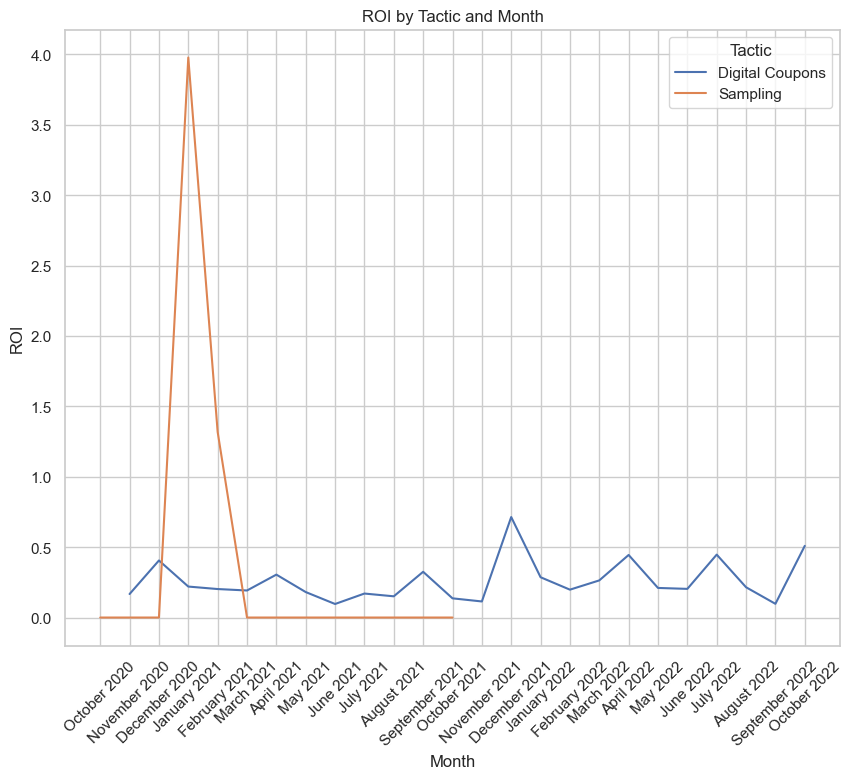

In [199]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month_year', y='ROI', hue='Tactic', data=roi_consumer, markers=True)
plt.xticks(rotation=45)
plt.title('ROI by Tactic and Month')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.show()

# SEASONAL TRENDS IN SALES ACCORDING TO TACTICS

# Summary Group- Base- Quarter

In [204]:
roi_base['Tactic'].unique()

array(['COVID', 'Competitive', 'Core/Base', 'Distribution',
       'New Subscribe & Save', 'Price', 'Seasonality', 'Trend', 'VPC'],
      dtype=object)

In [215]:
base_df

,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter,Return_On_Sales
2,Competitive,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,October,2020,10,4,0.06
3,Core/Base,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,October,2020,10,4,0.06
4,COVID,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,October,2020,10,4,0.06
7,Distribution,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,October,2020,10,4,0.06
13,New Subscribe & Save,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,October,2020,10,4,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
3103,New Subscribe & Save,Base,New Subscribe & Save,0.0,4.486856e+04,2692.113363,0.0,October,2022,10,4,0.06
3112,Price,Base,Price,0.0,-8.863422e+05,-53180.531040,0.0,October,2022,10,4,0.06
3115,Seasonality,Base,Seasonality,0.0,2.634118e+05,15804.705870,0.0,October,2022,10,4,0.06
3117,Trend,Base,Trend,0.0,2.246527e+05,13479.160410,0.0,October,2022,10,4,0.06


In [222]:
#base_df = base_df.drop('Return_On_Sales',axis=1)
base_df = base_df.drop('Event',axis=1)

In [224]:
base_df.head()

,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
2,Base,Competitive,0.0,1.218384e+05,7310.306924,0.0,October,2020,10,4
3,Base,Core/Base,0.0,1.581304e+07,948782.305600,0.0,October,2020,10,4
4,Base,COVID,0.0,-7.462117e+05,-44772.703120,0.0,October,2020,10,4
7,Base,Distribution,0.0,6.492850e+04,3895.710300,0.0,October,2020,10,4
13,Base,New Subscribe & Save,0.0,3.062327e+04,1837.396447,0.0,October,2020,10,4


In [243]:
base_quarter = base_df.groupby(['quarter','Tactic'])['Sales Volume'].sum().reset_index()

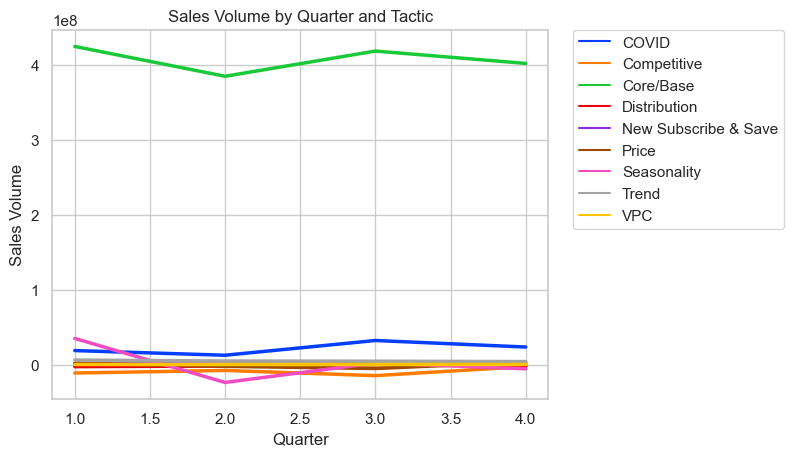

In [265]:
sns.lineplot(x='quarter', y='Sales Volume', hue='Tactic', data=base_quarter, palette='bright', linewidth=2.5)
plt.title('Sales Volume by Quarter and Tactic')
plt.xlabel('Quarter')
plt.ylabel('Sales Volume')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.gca().get_legend().legendHandles[0].set_label('COVID')
plt.gca().get_legend().legendHandles[1].set_label('Competitive')
plt.gca().get_legend().legendHandles[2].set_label('Core/Base')
plt.gca().get_legend().legendHandles[3].set_label('Distribution')
plt.gca().get_legend().legendHandles[4].set_label('New Subscribe & Save')
plt.gca().get_legend().legendHandles[5].set_label('Price')
plt.gca().get_legend().legendHandles[6].set_label('Seasonality')
plt.gca().get_legend().legendHandles[7].set_label('Trend')
plt.gca().get_legend().legendHandles[8].set_label('VPC')

plt.show()

# Summary Group- Media- Quarter

In [260]:
media_df

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,month_name,year,month,quarter
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,October,2020,10,4
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,October,2020,10,4
5,2020-10-10,Digital Display,Media,Digital Display,43.251484,1.843165e+06,110589.919000,95935.876380,October,2020,10,4
8,2020-10-10,Ecomm: Retail Display - Dollar General,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
9,2020-10-10,Ecomm: Retail Display - Target,Media,Ecomm: Retail Display,0.000000,0.000000e+00,0.000000,0.000000,October,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2022-10-01,Paid Social: Meta,Media,Paid Social: Meta,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3109,2022-10-01,Paid Social: Pinterest,Media,Paid Social: Pinterest,0.000375,9.684746e+02,58.108474,1.850603,October,2022,10,4
3110,2022-10-01,Paid Social: Twitter,Media,Paid Social: Twitter,0.000000,0.000000e+00,0.000000,0.000000,October,2022,10,4
3111,2022-10-01,PR,Media,PR,0.241373,1.392311e+04,835.386808,115909.615500,October,2022,10,4


In [261]:
media_quarter = media_df.groupby(['quarter','Tactic'])['Sales Volume'].sum().reset_index()

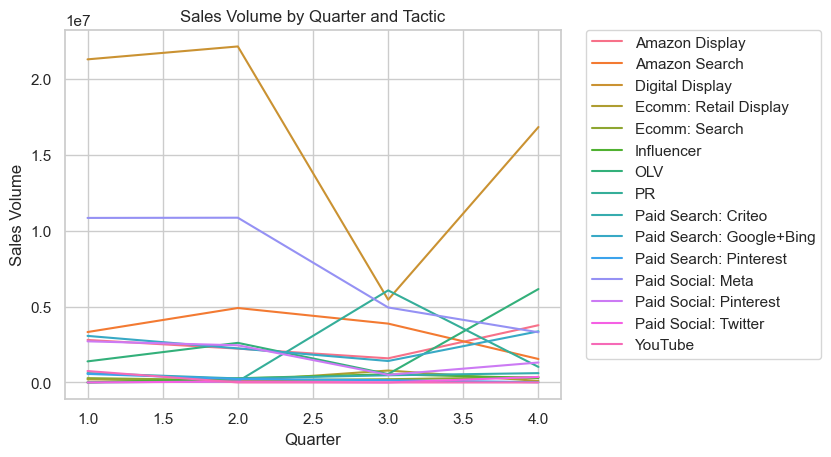

In [262]:
sns.lineplot(x='quarter', y='Sales Volume', hue='Tactic', data=media_quarter)
plt.title('Sales Volume by Quarter and Tactic')
plt.xlabel('Quarter')
plt.ylabel('Sales Volume')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()